# New Section

# Image Classification Using TensorFlow


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
fashion_mnist = keras.datasets.fashion_mnist

In [15]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [16]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandle','Shirt','Sneaker','Bag','Ankle boot']

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)

60000

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

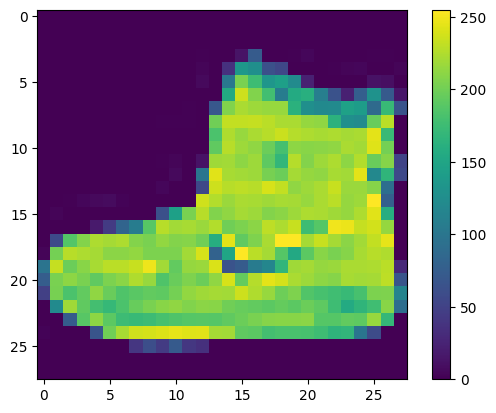

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
train_images = train_images/255.0
test_images=test_images/255.0

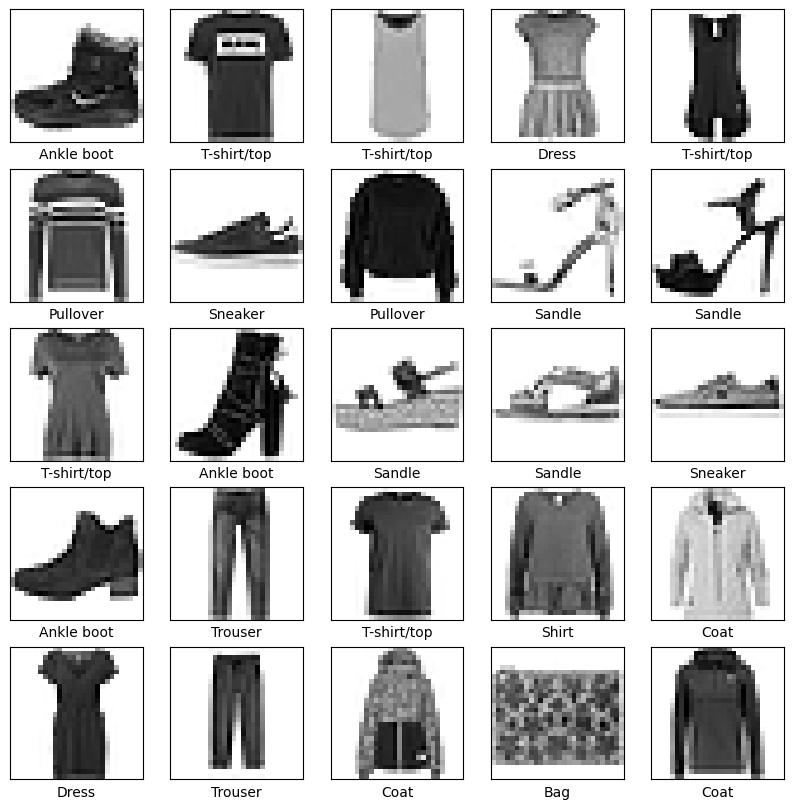

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),

    Dense(10, activation='softmax')
])

In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [27]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5034 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3797 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3400 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3141 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2993 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2835 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2692 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2613 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2497 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [29]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8849
Test accuracy: 0.8848999738693237


# Predictions


In [36]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([7.0937404e-07, 1.7062892e-13, 2.3871596e-09, 2.0353723e-12,
       1.8766413e-07, 3.4980357e-03, 1.6704297e-09, 2.2986187e-03,
       1.4125981e-09, 9.9420244e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [40]:
#Orginal Image
test_labels[0]

9

In [41]:
np.argmax(predictions[9999])

5

In [42]:
test_labels[9999]

5

In [43]:
#Test accuracy: 0.8848999738693237